Historical sales data,from  2010-02-05(2010Feb) to around 2012-11-01(2012Nov). 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
#%load_ext autoreload
#%autoreload 2

#### Load the data

In [3]:
retail_data = pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/retail_data_eda.csv')

In [4]:
retail_data.shape

(421570, 22)

In [5]:
retail_data.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,AvgWeeklySalesperStore,AvgWeeklySalesperDept,AverageMonthlySales
0,0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,19213.485088,16008.779217
1,1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,43607.020113,16008.779217
2,2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,11793.698516,16008.779217
3,3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,25974.630238,16008.779217
4,4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,21365.583515,16008.779217


In [6]:
retail_data.drop(['Unnamed: 0'], axis=1, inplace=True) # pls specify inplace=True to do operation inplace.

In [7]:
retail_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,AvgWeeklySalesperStore,AvgWeeklySalesperDept,AverageMonthlySales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,19213.485088,16008.779217
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,43607.020113,16008.779217
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,11793.698516,16008.779217
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,25974.630238,16008.779217
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,21365.583515,16008.779217


#### Train/Test/Split

In [8]:
#Check data types of retail_data 
retail_data.dtypes

Store                       int64
Dept                        int64
Date                       object
Weekly_Sales              float64
IsHoliday_x                  bool
Type                       object
Size                        int64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
IsHoliday_y                  bool
Month                       int64
AvgWeeklySalesperStore    float64
AvgWeeklySalesperDept     float64
AverageMonthlySales       float64
dtype: object

Seperate categorical and numerical columns

In [9]:
#Let's do our feature selection.
#Make a variable called 'features', and a list containing all Categorical(object) types columns 
features = ['Store','Type','Dept']

In [10]:
X= retail_data[features]

##### Create Dummies for categorical columns

In [11]:
#Creating dummies for the features columns
X= pd.get_dummies(X)   

In [12]:
# Make a dependent variable called y, and assign it the column which we have to predict
y= retail_data.Weekly_Sales

In [13]:
#Make a variable called numerical and a list containing all Numerical columns
X_numerical= retail_data.drop(['Date','Store','Type','Dept','Weekly_Sales'], axis=1)

Now Recombine the categorical and numerical columns. 

In [14]:
X_merged= X.merge(X_numerical, left_index=True, right_index=True)

In [15]:
#features.append(X_numerical) # append 'X_numerical' list to features list.
#Ref: https://www.w3schools.com/python/gloss_python_join_lists.asp     # for lists, not suitable for df.

##### Time-Series split

In [16]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2, max_train_size=None, test_size=None, gap=0)
#X_test, y_train, y_test
for train_index, test_index in tscv.split(X_merged):
#train_index, test_index = tscv.split(X_merged)
    X_train, X_test = X_merged.loc[train_index], X_merged.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
                                                             #use .loc for X_merged since it's a df

Refer :https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
ref:https://stackoverflow.com/questions/45352909/pandas-indexingerror-unalignable-boolean-series-provided-as-indexer 

In [17]:
#Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 123
#X_train, X_test, y_train, y_test= train_test_split(X, y, 
 #                                                test_size = 0.25,
  #                                               random_state = 123)

##### Scale the numerical columns to prep for model creation

In [18]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_numerical)
X_numerical_scaled=scaler.transform(X_numerical)
#X_test_scaled=scaler.transform(X_test)

In [19]:
#scale data
#from sklearn import preprocessing
#import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled=scaler.transform(X_train)
#X_test_scaled=scaler.transform(X_test)

In [20]:
#print(X_numerical_scaled)

In [21]:
retail_data.dtypes

Store                       int64
Dept                        int64
Date                       object
Weekly_Sales              float64
IsHoliday_x                  bool
Type                       object
Size                        int64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
IsHoliday_y                  bool
Month                       int64
AvgWeeklySalesperStore    float64
AvgWeeklySalesperDept     float64
AverageMonthlySales       float64
dtype: object

Notice the 'date' column is object. Let's convert it to python datetime.  If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on the timestamp. 

Now, to do time series analysis on a Pandas dataframe is overkill, and is actually counter-productive. It's much more easy to carry out this type of analysis if we convert our data to a series first!!

In [22]:
retail_data['Date']= pd.to_datetime(retail_data['Date'])
retail_data.set_index('Date', inplace=True)

In [23]:
retail_data.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,AvgWeeklySalesperStore,AvgWeeklySalesperDept,AverageMonthlySales
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,19213.485088,16008.779217
2010-02-05,1,2,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,43607.020113,16008.779217
2010-02-05,1,3,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,11793.698516,16008.779217
2010-02-05,1,4,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,25974.630238,16008.779217
2010-02-05,1,5,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,21365.583515,16008.779217


Now we can see that our dataframe is indexed by date, as time-series should be . 

Should i use all features ? Should I perform TIME SERIES analysis on entire dataframe or only on select columns(pd.series)? 

In [24]:
#X_new = retail_data.drop(['Weekly_Sales'], axis=1)

In [25]:
y = retail_data.Weekly_Sales

In [26]:
#Check the type of y. 
type(y)

pandas.core.series.Series

We can see that y is of Series datatype

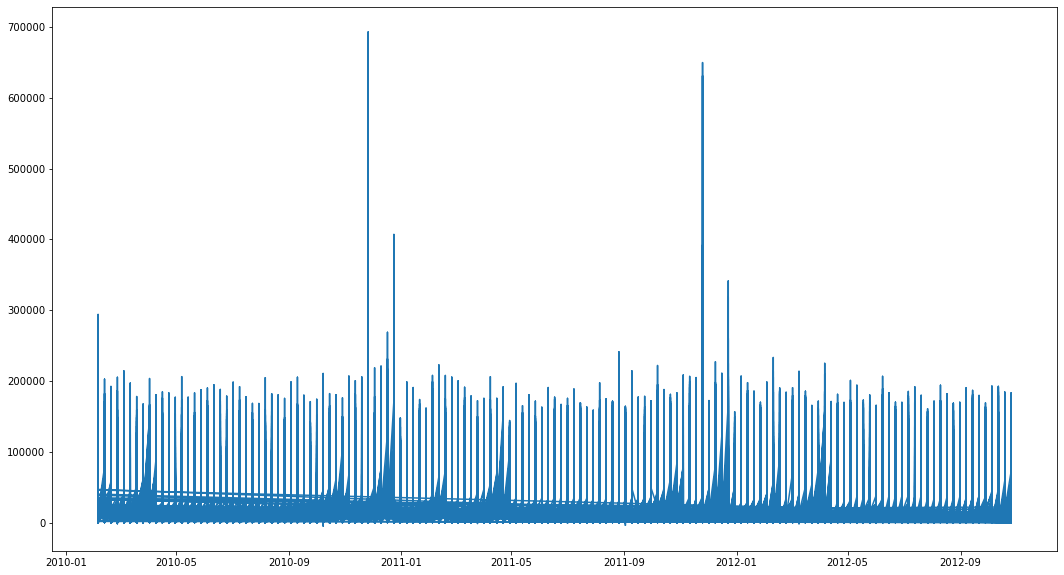

In [27]:
plt.figure(figsize=(18,10))
plt.plot(y)

We can see some seasonality in data. Trend ? Noise ??

In [28]:
#Does this look ok?? #Is this ready for modeling now ? or does it require more work ?

In [ ]:
#And also , we are doing Time series analysis only on Date column right? 